# Analisis Data E-Commerce

Di dunia e-commerce, pemahaman yang mendalam mengenai produk dan perilaku pelanggan sangat penting untuk meningkatkan penjualan dan kepuasan pelanggan. Untuk itu, dibutuhkan analisis yang dapat mengelompokkan produk berdasarkan karakteristik tertentu dan memprediksi produk mana yang berpotensi menjadi laris. Melalui analisis data yang tepat, bisnis dapat lebih mudah menentukan strategi pemasaran yang efektif dan meningkatkan efisiensi operasional. Dataset yang digunakan dalam analisis ini diambil dari [Dataset Kaggle Brazilian E-Commerce](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce), yang mencakup informasi terkait produk, pengiriman, dan ulasan pelanggan dan lain sebagainnya.

## Pertanyaan Bisnis

- Unsupervised Learning: Bagaimana produk dapat dikelompokkan berdasarkan harga, ongkos kirim, ulasan pelanggan, dan karakteristik pengiriman (durasi dan akurasi)?

- Supervised Learning: Produk mana yang berpotensi untuk lebih laku berdasarkan karakteristik yang telah dikelompokkan?

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

Jika Menggunakan G-Collab aktifkan ini

In [2]:
#import kagglehub
#import os

# Data Wrangling

## Gathering Data

### load data orders

In [3]:
# path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

In [4]:
orders_df = pd.read_csv("dataset/olist_orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
# file_path = os.path.join(path, 'olist_orders_dataset.csv')
# orders_df = pd.read_csv(file_path)
# orders_df.head()

### load data order items

In [6]:
items_df = pd.read_csv("dataset/olist_order_items_dataset.csv")
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
# file_path = os.path.join(path, 'olist_order_items_dataset.csv')
# items_df = pd.read_csv(file_path)
# items_df.head()

### load data products

In [8]:
products_df = pd.read_csv("dataset/olist_products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
# file_path = os.path.join(path, 'olist_products_dataset.csv')
# products_df = pd.read_csv(file_path)
# products_df.head()

### load data reviews

In [10]:
reviews_df = pd.read_csv("dataset/olist_order_reviews_dataset.csv", on_bad_lines='skip')
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [11]:
# file_path = os.path.join(path, 'olist_order_reviews_dataset.csv')
# reviews_df = pd.read_csv(file_path, on_bad_lines='skip')
# reviews_df.head()

### load data sellers

In [12]:
sellers_df = pd.read_csv("dataset/olist_sellers_dataset.csv", on_bad_lines='skip')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [13]:
# file_path = os.path.join(path, 'olist_sellers_dataset.csv')
# sellers_df = pd.read_csv(file_path, on_bad_lines='skip')
# sellers_df.head()

### load data payments

In [14]:
payments_df = pd.read_csv("dataset/olist_order_payments_dataset.csv")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [15]:
# file_path = os.path.join(path, 'olist_order_payments_dataset.csv')
# payments_df = pd.read_csv(file_path)
# payments_df.head()

### load data translations

In [16]:
translations_df = pd.read_csv("dataset/product_category_name_translation.csv")
translations_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [17]:
# file_path = os.path.join(path, 'product_category_name_translation.csv')
# translations_df = pd.read_csv(file_path)
# translations_df.head()

## Assessing Data

### assess the data orders

In [18]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [19]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [20]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [21]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### assess the data order items

In [22]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [23]:
items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [24]:
print("Jumlah duplikasi: ", items_df.duplicated().sum())

Jumlah duplikasi:  0


In [25]:
items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### assess the data products

In [26]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [27]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [28]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [29]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### assess the data reviews

In [30]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [31]:
reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [32]:
print("Jumlah duplikasi: ", reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [33]:
reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### assess the data sellers

In [34]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [35]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [36]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [37]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### assess the data payments

In [38]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [39]:
payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [40]:
print("Jumlah duplikasi: ", payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [41]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### assess the data translations

In [42]:
translations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [43]:
translations_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [44]:
print("Jumlah duplikasi: ", translations_df.duplicated().sum())

Jumlah duplikasi:  0


In [45]:
translations_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


## Cleaning Data

### clear data orders

#### Menangani Mising Value

In [46]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

##### Menangani Mising Value order_approved_at

In [47]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


**Untuk mengatasi missing value pada kolom order_approved_at, data diisi dengan nilai dari kolom order_purchase_timestamp jika status pesanan adalah canceled. Keputusan ini memastikan data tetap konsisten tanpa menghapus baris, sesuai dengan konteks bisnis.**

In [48]:
orders_df['order_approved_at'] = orders_df.apply(
    lambda row: row['order_purchase_timestamp'] if pd.isna(row['order_approved_at']) and row['order_status'] == 'canceled' else row['order_approved_at'],
    axis=1
)

In [49]:
print("Jumlah missing value (order approved at) setelah pembersihan cancaled :\n", orders_df.isna().sum())

Jumlah missing value (order approved at) setelah pembersihan cancaled :
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  19
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [50]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaN,NaN,NaN,2018-01-11 00:00:00
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaN,NaN,NaN,2018-03-07 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaN,NaN,NaN,2017-12-12 00:00:00
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00


**Keputusan yang diambil adalah mengisi nilai order_approved_at untuk status delivered dengan menggunakan rata-rata waktu antara order_purchase_timestamp dan order_delivered_carrier_date. Ini dilakukan untuk memperkirakan kapan pesanan disetujui berdasarkan pola waktu yang ada pada data yang sudah lengkap.**

In [51]:
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

average_time = (orders_df.loc[orders_df['order_status'] == 'delivered', 'order_delivered_carrier_date'] -
                orders_df.loc[orders_df['order_status'] == 'delivered', 'order_purchase_timestamp']).mean()

orders_df.loc[orders_df['order_status'] == 'delivered', 'order_approved_at'] = (
    orders_df.loc[orders_df['order_status'] == 'delivered', 'order_purchase_timestamp'] + average_time
)

In [52]:
print("Jumlah missing value (order approved at) setelah pembersihan delivered:\n", orders_df.isna().sum())

Jumlah missing value (order approved at) setelah pembersihan delivered:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   5
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [53]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaN,NaT,NaN,2018-01-11 00:00:00
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaN,NaT,NaN,2018-03-07 00:00:00
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaN,NaT,NaN,2017-12-12 00:00:00
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaN,NaT,NaN,2018-01-08 00:00:00
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaN,NaT,NaN,2017-12-01 00:00:00


**Keputusan yang diambil adalah mengisi nilai order_approved_at pada status created dengan rata-rata waktu antara order_purchase_timestamp dan order_delivered_carrier_date untuk memastikan kelancaran analisis dan akurasi**

In [54]:
time_diff = orders_df[orders_df.order_status == 'delivered'].apply(
    lambda row: (row['order_delivered_carrier_date'] - row['order_purchase_timestamp']).days, axis=1
)
average_time_diff = time_diff.mean()

In [55]:
orders_df.loc[
    (orders_df.order_status == 'created') & (orders_df['order_approved_at'].isna()),
    'order_approved_at'
] = orders_df['order_purchase_timestamp'] + pd.to_timedelta(average_time_diff, unit='D')

In [56]:
print("Jumlah missing value (order approved at) setelah pembersihan created:\n", orders_df.isna().sum())

Jumlah missing value (order approved at) setelah pembersihan created:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


##### Menangani Mising Value order_delivered_carrier_date

In [57]:
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaN,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaN,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaN,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-08-31 16:13:44,NaT,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-09-06 18:45:47,NaT,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaN,2017-09-15 00:00:00


In [58]:
orders_df.order_delivered_carrier_date.value_counts()

order_delivered_carrier_date
2018-05-09 15:48:00    47
2018-05-10 18:29:00    32
2018-05-07 12:31:00    21
2018-05-02 15:15:00    16
2018-07-24 16:07:00    16
                       ..
2018-01-03 17:37:21     1
2017-10-27 20:07:58     1
2017-11-21 18:57:37     1
2018-03-21 20:03:37     1
2018-03-09 22:11:59     1
Name: count, Length: 81018, dtype: int64

In [59]:
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'], errors='coerce')

**Untuk analisis lebih akurat, digunakan median untuk memberikan nilai tengah yang tidak terpengaruh oleh data ekstrem, sehingga bisa memberikan analisis yang lebih stabil dan akurat.**

In [60]:
average_date = orders_df['order_delivered_carrier_date'].mean()
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna(average_date)

In [61]:
print("Jumlah missing value setelah pembersihan (order_delivered_carrier_date:\n", orders_df.isna().sum())

Jumlah missing value setelah pembersihan (order_delivered_carrier_date:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


##### Menangani Mising Value order_delivered_customer_date

In [62]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2018-01-04 21:49:48.138278656,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00.000000000,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,2018-01-04 21:49:48.138278656,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,2018-01-04 21:49:48.138278656,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23.000000000,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2018-08-31 16:13:44,2018-01-04 21:49:48.138278656,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,2018-01-04 21:49:48.138278656,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2018-09-06 18:45:47,2018-01-04 21:49:48.138278656,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,2018-01-04 21:49:48.138278656,NaN,2017-09-15 00:00:00


In [63]:
orders_df.order_delivered_customer_date.value_counts()

order_delivered_customer_date
2018-05-08 23:38:46    3
2016-10-27 17:32:07    3
2018-02-14 21:09:19    3
2017-06-19 18:47:51    3
2018-05-08 19:36:48    3
                      ..
2018-07-12 17:48:45    1
2018-05-18 18:24:36    1
2018-01-17 13:29:13    1
2018-06-29 11:21:34    1
2018-03-16 13:08:30    1
Name: count, Length: 95664, dtype: int64

**kasus yang ini sama seperti mising value sebelumnnya jadi perlu mengonversi kolom menjadi format tanggal (date time) dan kemudian mengisi missing value**

In [64]:
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'], errors='coerce')

**Digunakan median memberikan nilai tengah yang tidak terpengaruh oleh data ekstrem, sehingga bisa memberikan gambaran yang lebih stabil dan akurat.**

In [65]:
median_date = orders_df['order_delivered_customer_date'].median()
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(median_date)

In [66]:
print("Jumlah missing value (order_delivered_customer_date) setelah pembersihan:\n", orders_df.isna().sum())

Jumlah missing value (order_delivered_customer_date) setelah pembersihan:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


##### Pengecekan Akhir Setalah Pembersihan 3 Missing Value pada orders_df

In [67]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### Mengecek Duplikasi id

In [68]:
orders_df.order_id.is_unique

True

**True menunjukkan bahwa setiap nilai di kolom orders_id hanya muncul sekali, jadi tidak ada duplikasi.**

#### Memeriksa Format Tanggal

In [69]:
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date'
]

In [70]:
def check_date_format(df, date_columns):
    for col in date_columns:
        try:
            df[col] = pd.to_datetime(df[col], errors='raise')
            print(f"Kolom '{col}' valid. Tipe data: {df[col].dtype}")
        except Exception as e:
            print(f"Error pada kolom '{col}': {e}")

In [71]:
check_date_format(orders_df, date_columns)

Kolom 'order_purchase_timestamp' valid. Tipe data: datetime64[ns]
Kolom 'order_approved_at' valid. Tipe data: datetime64[ns]
Kolom 'order_delivered_carrier_date' valid. Tipe data: datetime64[ns]
Kolom 'order_delivered_customer_date' valid. Tipe data: datetime64[ns]


**kalau valid berarti menunjukan setiap kolom tanggal terformat dengan benar**

In [72]:
orders_df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date            object
dtype: object

#### Menangani Tanggal Pengiriman Yang Lebih Awal Dari Tanggal Pembelian

In [73]:
invalid_delivery_dates = orders_df[orders_df['order_delivered_customer_date'] < orders_df['order_purchase_timestamp']]
print(f"\nJumlah baris dengan tanggal pengiriman lebih awal dari tanggal pembelian: {invalid_delivery_dates.shape[0]}")


Jumlah baris dengan tanggal pengiriman lebih awal dari tanggal pembelian: 1023


In [74]:
print("\nBeberapa baris dengan tanggal pengiriman lebih awal dari tanggal pembelian:")
invalid_delivery_dates[['order_id', 'order_purchase_timestamp', 'order_delivered_customer_date']].head()


Beberapa baris dengan tanggal pengiriman lebih awal dari tanggal pembelian:


,order_id,order_purchase_timestamp,order_delivered_customer_date
44,ee64d42b8cf066f35eac1cf57de1aa85,2018-06-04 16:44:48,2018-02-02 19:28:10.500
103,0760a852e4e9d89eb77bf631eaaf1c84,2018-08-03 17:44:42,2018-02-02 19:28:10.500
299,3b4ad687e7e5190db827e1ae5a8989dd,2018-06-28 12:52:15,2018-02-02 19:28:10.500
305,b68d69564a79dea4776afa33d1d2fcab,2018-02-28 08:57:03,2018-02-02 19:28:10.500
333,f373335aac9a659de916f7170b8bc07a,2018-03-17 15:32:31,2018-02-02 19:28:10.500


**Dikarenakan adanya tanggal pengiriman yang lebih awal dari tanggal pembelian, keputusan yang diambil adalah mengganti tanggal pengiriman dengan tanggal pembelian sebagai estimasi. Hal ini untuk memastikan data tetap konsisten dan analisis berjalan dengan akurat.**

In [75]:
orders_df['order_delivered_customer_date'] = orders_df.apply(
    lambda row: row['order_purchase_timestamp'] if row['order_delivered_customer_date'] < row['order_purchase_timestamp'] else row['order_delivered_customer_date'],
    axis=1
)

In [76]:
invalid_delivery_dates = orders_df[orders_df['order_delivered_customer_date'] < orders_df['order_purchase_timestamp']]
print(f"\nHasil setelah penghapusan untuk memastikan perubahan: {invalid_delivery_dates.shape[0]}")


Hasil setelah penghapusan untuk memastikan perubahan: 0


#### Menangani Ketidaksesuaian pada Tanggal Pengiriman oleh Kurir

In [77]:
invalid_dates_carrier = orders_df[orders_df['order_delivered_customer_date'] < orders_df['order_delivered_carrier_date']]
print(f"Jumlah anomali: {len(invalid_dates_carrier)}")
invalid_dates_carrier.head()

Jumlah anomali: 570


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,2018-06-04 16:44:48,2018-06-28 00:00:00
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,2018-06-28 12:52:15,2018-08-03 00:00:00
305,b68d69564a79dea4776afa33d1d2fcab,de1e5517fb50896bbdcff5814fb31802,shipped,2018-02-28 08:57:03,2018-02-28 10:40:35,2018-03-05 16:10:13,2018-02-28 08:57:03,2018-03-23 00:00:00
333,f373335aac9a659de916f7170b8bc07a,f06a94a401e52fb019c72f2e8bbf6a2f,shipped,2018-03-17 15:32:31,2018-03-17 15:48:40,2018-03-20 21:08:28,2018-03-17 15:32:31,2018-04-13 00:00:00
374,5869074071e0f56e9085dc3742c97b2a,7203eb38fea2b4a15dd6c39575314aa4,shipped,2018-06-08 20:06:48,2018-06-12 04:35:37,2018-06-12 14:09:00,2018-06-08 20:06:48,2018-06-28 00:00:00


In [78]:
total_orders = orders_df.shape[0]
invalid_dates_carrier = orders_df[orders_df['order_delivered_customer_date'] < orders_df['order_delivered_carrier_date']]
valid_dates_carrier = total_orders - invalid_dates_carrier.shape[0]
percentage_invalid_carrier = (invalid_dates_carrier.shape[0] / total_orders) * 100
percentage_valid_carrier = 100 - percentage_invalid_carrier

In [79]:
comparison = {
    "Total Orders": total_orders,
    "Invalid Orders (Pengiriman Kurir Salah Waktu)": invalid_dates_carrier.shape[0],
    "Valid Orders (Pengiriman Kurir)": valid_dates_carrier,
    "Persentase Invalid Orders (Pengiriman Kurir)": percentage_invalid_carrier,
    "Persentase Valid Orders (Pengiriman Kurir)": percentage_valid_carrier,
}
comparison

{'Total Orders': 99441,
 'Invalid Orders (Pengiriman Kurir Salah Waktu)': 570,
 'Valid Orders (Pengiriman Kurir)': 98871,
 'Persentase Invalid Orders (Pengiriman Kurir)': 0.5732042115425228,
 'Persentase Valid Orders (Pengiriman Kurir)': 99.42679578845748}

**Karena hanya 0,57% data yang tidak sesuai antara tanggal pengiriman customer dan tanggal pengiriman kurir, keputusan yang diambil adalah menyesuaikan tanggal pengiriman oleh kurir agar sesuai dengan tanggal pengiriman customer yang lebih logis. Hal ini dilakukan untuk memastikan data yang digunakan dalam analisis waktu pengiriman yang cepat tetap akurat dan relevan.**

In [80]:
orders_df.loc[orders_df['order_delivered_customer_date'] < orders_df['order_delivered_carrier_date'], 'order_delivered_carrier_date'] = orders_df['order_delivered_customer_date']

In [81]:
print(f"\nHasil setelah penghapusan untuk memastikan perubahan: {orders_df[orders_df['order_delivered_customer_date'] < orders_df['order_delivered_carrier_date']].shape[0]}")


Hasil setelah penghapusan untuk memastikan perubahan: 0


### clear  data order items

#### Memeriksa Format Tanggal

In [82]:
items_df['shipping_limit_date'] = pd.to_datetime(items_df['shipping_limit_date'], errors='coerce')

In [83]:
items_df['price'] = items_df['price'].astype(float)
items_df['freight_value'] = items_df['freight_value'].astype(float)

In [84]:
items_df.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

#### Memeriksa price dan freight_value Yang Negatif

In [85]:
negative_price = items_df[items_df['price'] < 0]
negative_freight = items_df[items_df['freight_value'] < 0]

print(f"Jumlah harga negatif: {negative_price.shape[0]}")
print(f"Jumlah biaya pengiriman negatif: {negative_freight.shape[0]}")

Jumlah harga negatif: 0
Jumlah biaya pengiriman negatif: 0


#### Memeriksa price dan freight_value Yang Kosong (0)

In [86]:
zero_price = items_df[items_df['price'] == 0]
zero_freight = items_df[items_df['freight_value'] == 0]

print(f"Jumlah harga kosong :{zero_price.shape[0]}")
print(f"Jumlah biaya pengiriman kosong :{zero_freight.shape[0]}")

Jumlah harga kosong :0
Jumlah biaya pengiriman kosong :383


In [87]:
total_items = items_df.shape[0]
total_zero_freight = zero_freight.shape[0]
percentage_zero_freight = (zero_freight.shape[0] / total_items) * 100
percentage_non_zero_freight = 100 - percentage_zero_freight

comparison = {
    "Total Data Items": total_items,
    "Data dengan Biaya Pengiriman Kosong": total_zero_freight,
    "Persentase Biaya Pengiriman Kosong": percentage_zero_freight,
    "Persentase Biaya Pengiriman Tidak Kosong": percentage_non_zero_freight
}
comparison

{'Total Data Items': 112650,
 'Data dengan Biaya Pengiriman Kosong': 383,
 'Persentase Biaya Pengiriman Kosong': 0.33999112294718153,
 'Persentase Biaya Pengiriman Tidak Kosong': 99.66000887705282}

**Dikarenakan jumlah biaya pengiriman kosong hanya mencakup kurang dari 1% dari total data, opsi penghapusan data (drop) dipilih untuk memastikan keakuratan analisis terkait preferensi produk dan waktu pengiriman.**

In [88]:
items_df.drop(items_df[items_df['freight_value'] == 0].index, inplace=True)

In [89]:
zero_freight_after_drop = items_df[items_df['freight_value'] == 0]
print(f"Hasil setelah penghapusan untuk memastikan perubahan: {zero_freight_after_drop.shape[0]}")

Hasil setelah penghapusan untuk memastikan perubahan: 0


#### Memeriksa Kecocokan Beberapa Item (order_id, product_id, seller_id)

##### Kecocokan Antara order_id Dengan tabel orders_df

In [90]:
invalid_order_ids = items_df[~items_df['order_id'].isin(orders_df['order_id'])]
print(f"Jumlah order_id yang tidak cocok: {invalid_order_ids.shape[0]}")

Jumlah order_id yang tidak cocok: 0


**Order ID yang tidak ditemukan pada tabel orders_df dihapus karena data ini tidak memiliki informasi pendukung yang lengkap untuk analisis. Pembersihan ini bertujuan untuk meningkatkan akurasi analisis dan prediksi terkait pola pembelian dan ulasan produk**

In [91]:
items_df.drop(index=items_df[~items_df['order_id'].isin(orders_df['order_id'])].index, inplace=True)

In [92]:
invalid_order_ids = items_df[~items_df['order_id'].isin(orders_df['order_id'])]
print(f"Jumlah order_id yang tidak cocok setelah pembersihan: {invalid_order_ids.shape[0]}")
print(f"Jumlah data setelah pembersihan: {items_df.shape[0]}")

Jumlah order_id yang tidak cocok setelah pembersihan: 0
Jumlah data setelah pembersihan: 112267


##### Kecocokan Antara product_id Dengan tabel products_df

In [93]:
invalid_product_ids = items_df[~items_df['product_id'].isin(products_df['product_id'])]
print(f"Jumlah product_id yang tidak cocok: {invalid_product_ids.shape[0]}")

Jumlah product_id yang tidak cocok: 0


##### Kecocokan Antara sellers_id Dengan tabel sellers_df

In [94]:
invalid_seller_ids = items_df[~items_df['seller_id'].isin(sellers_df['seller_id'])]
print(f"Jumlah seller_id yang tidak cocok: {invalid_seller_ids.shape[0]}")

Jumlah seller_id yang tidak cocok: 0


##### Memeriksa Duplikasi Beberapa Item (order_id, product_id, seller_id)

In [95]:
items_df.duplicated(subset=['order_id', 'product_id', 'seller_id']).sum()
print("Jumlah duplikasi berdasarkan order_id, product_id, dan seller_id:", items_df.duplicated(subset=['order_id', 'product_id', 'seller_id']).sum())

Jumlah duplikasi berdasarkan order_id, product_id, dan seller_id: 10181


In [96]:
items_df[items_df.duplicated(subset=['order_id', 'product_id', 'seller_id'])]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
...,...,...,...,...,...,...,...
112617,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


**Duplikasi data berdasarkan kombinasi order_id, product_id, dan seller_id ditemukan sebanyak 10.181 baris. Untuk menjaga integritas analisis, data duplikasi dihapus dengan menyimpan baris pertama dari setiap kombinasi, memastikan hasil clustering dan prediksi tetap akurat.**

In [97]:
items_df.drop_duplicates(subset=['order_id', 'product_id', 'seller_id'], keep='first', inplace=True)
print("Jumlah duplikasi berdasarkan order_id, product_id, dan seller_id:", items_df.duplicated(subset=['order_id', 'product_id', 'seller_id']).sum())

Jumlah duplikasi berdasarkan order_id, product_id, dan seller_id: 0


In [98]:
print(f"Jumlah data items_df setelah pengecekan: {items_df.shape[0]}")

Jumlah data items_df setelah pengecekan: 102086


### clear  data products

#### Menangani Mising Value

##### Perbandingan Antara Total Data Dengan missing value

In [99]:
missing_values = products_df.isna().sum()
missing_percentage = (missing_values / len(products_df)) * 100
missing_comparison = pd.DataFrame({
    'Missing Values': missing_values,
    'Total Values': len(products_df),
    'Missing Percentage': missing_percentage
})

In [100]:
print(missing_comparison)

                            Missing Values  Total Values  Missing Percentage
product_id                               0         32951            0.000000
product_category_name                  610         32951            1.851234
product_name_lenght                    610         32951            1.851234
product_description_lenght             610         32951            1.851234
product_photos_qty                     610         32951            1.851234
product_weight_g                         2         32951            0.006070
product_length_cm                        2         32951            0.006070
product_height_cm                        2         32951            0.006070
product_width_cm                         2         32951            0.006070


##### Menangani Mising Value product_category_name, product_name_lenght, product_description_lenght, & product_photos_qty

In [101]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


**Karena missing values di kolom product_category_name, product_name_lenght, product_description_lenght, & product_photos_qty hanya sekitar index 1.9% (dibulatkan) dari total keseluruhan dataset, memutuskan untuk menghapus baris dengan nilai hilang, agar menghindari bias dan outlier**

In [102]:
products_df.dropna(subset=['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty'], inplace=True)

In [103]:
print("Jumlah missing value setelah pembersihan (product_category_name, product_name_lenght, product_description_lenght, & product_photos_qty):\n", products_df.isna().sum())

Jumlah missing value setelah pembersihan (product_category_name, product_name_lenght, product_description_lenght, & product_photos_qty):
 product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64


##### Menangani Mising Value product_category_name, product_name_lenght, product_description_lenght, & product_photos_qty

In [104]:
products_df[products_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN


In [105]:
products_df['product_weight_g'] = products_df['product_weight_g'].fillna(products_df['product_weight_g'].median())
products_df['product_length_cm'] = products_df['product_length_cm'].fillna(products_df['product_length_cm'].median())
products_df['product_height_cm'] = products_df['product_height_cm'].fillna(products_df['product_height_cm'].median())
products_df['product_width_cm'] = products_df['product_width_cm'].fillna(products_df['product_width_cm'].median())

In [106]:
print("Jumlah missing value setelah pembersihan (product_weight_g, product_length_cm, product_height_cm, & product_width_cm).:\n",products_df.isna().sum())

Jumlah missing value setelah pembersihan (product_weight_g, product_length_cm, product_height_cm, & product_width_cm).:
 product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


##### Pengecekan Akhir Setalah Pembersihan 8 Missing Value pada items_df

In [107]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#### Menangani Nilai Ekstrem (Outliers)

##### Mengecek Produk Dengan Berat O Gram

In [108]:
products_df['product_weight_g'].describe()

count    32341.000000
mean      2276.907826
std       4279.234668
min          0.000000
25%        300.000000
50%        700.000000
75%       1900.000000
max      40425.000000
Name: product_weight_g, dtype: float64

In [109]:
print(f"Jumlah produk dengan berat kurang dari atau sama dengan 0 gram: {products_df[products_df['product_weight_g'] <= 0].shape[0]}")
products_df[products_df['product_weight_g'] <= 0].head()

Jumlah produk dengan berat kurang dari atau sama dengan 0 gram: 4


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0


**Karena terdapat nilai berat 0 gram pada produk cama_mesa_banho diganti dengan median berat produk kategori yang sama (dengan berat valid) untuk menjaga konsistensi data dan relevansi analisis.**

In [110]:
products_df.loc[products_df['product_weight_g'] == 0, 'product_weight_g'] = products_df.loc[
    (products_df['product_category_name'] == 'cama_mesa_banho') &
    (products_df['product_weight_g'] > 0),
    'product_weight_g'
].median()

In [111]:
print(f"Jumlah produk dengan berat kurang dari atau sama dengan 0 gram setelah perbaikan: {products_df[products_df['product_weight_g'] <= 0].shape[0]}")

Jumlah produk dengan berat kurang dari atau sama dengan 0 gram setelah perbaikan: 0


### clear  data reviews

#### Menangani Mising Value

##### Menangani Mising Value review_comment_title

In [112]:
reviews_df[reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


**Dikarenakan kolom tersebut tidak terlalu relavan dengan analisi ini kedepannya, maka opsi penghapusan kolom (review_comments_title) merupakan langkah terbaik agar analsiis data lebih akurat dan sesuai.**

In [113]:
reviews_df.drop(['review_comment_title'], axis=1, inplace=True)

In [114]:
reviews_df.head()

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


##### Menangani Mising Value review_comment_message

In [115]:
reviews_df[reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


**Sama Seperti kolom sebelumnnya, maka opsi penghapusan kolom (review_comments_message) merupakan langkah terbaik agar analsiis data lebih akurat dan sesuai.**

In [116]:
reviews_df.drop(['review_comment_message'], axis=1, inplace=True)

In [117]:
reviews_df.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53


##### Pengecekan Akhir Setalah Pembersihan 3 Missing Value pada orders_df

In [118]:
reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### Memeriksa Format Tanggal

In [119]:
reviews_df['review_creation_date'] = pd.to_datetime(reviews_df['review_creation_date'], errors='coerce')
reviews_df['review_answer_timestamp'] = pd.to_datetime(reviews_df['review_answer_timestamp'], errors='coerce')

In [120]:
reviews_df.dtypes

review_id                          object
order_id                           object
review_score                        int64
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

#### Memeriksa distribusi review_score

In [121]:
reviews_df['review_score'].value_counts()

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

#### Kecocokan Antara order_id Dengan tabel orders_df

In [122]:
missing_order_ids = reviews_df[~reviews_df['order_id'].isin(orders_df['order_id'])]
print(f"Jumlah order_id yang tidak cocok: {missing_order_ids.shape[0]}")

Jumlah order_id yang tidak cocok: 0


### clear  data sellers

#### Pengecekan Keunikan Kolom seller_id

In [123]:
is_unique = sellers_df['seller_id'].is_unique
print(f"Apakah seller_id unik? {is_unique}")

Apakah seller_id unik? True


**True menunjukkan bahwa setiap nilai di kolom seller_id hanya muncul sekali, jadi tidak ada duplikasi untuk seller_id.**

#### Pengecekan Kode Pos Tidak Valid

In [124]:
print("Distribusi Kode Pos:")
sellers_df['seller_zip_code_prefix'].astype(str).str.len().value_counts()

Distribusi Kode Pos:


seller_zip_code_prefix
5    2068
4    1027
Name: count, dtype: int64

In [125]:
invalid_zip_codes = sellers_df[sellers_df['seller_zip_code_prefix'].astype(str).str.len() == 4]
invalid_zip_codes

,seller_id,seller_zip_code_prefix,seller_city,seller_state
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
12,8bd0f31cf0a614c658f6763bd02dea69,1222,sao paulo,SP
13,05a48cc8859962767935ab9087417fbb,5372,sao paulo,SP
19,f9ec7093df3a7b346b7bcf7864069ca3,5138,sao paulo,SP
...,...,...,...,...
3083,e94b64dc6979b302a5a5be1662c83bb6,6852,itapecerica da serra,SP
3087,f00f5b35d0abcacbdd863672f4bb2c1a,1238,sao paulo,SP
3088,7bac63f6603d382cc8d0832eb6c100a8,5713,sao paulo,SP
3089,f1fdf2d13186575751aa25876536d85c,5314,sao paulo,SP


**Menghapus data dengan kode pos 4 digit karena kode pos yang valid di Brazil selalu memiliki 8 digit, misalnya "20920-000" untuk Rio de Janeiro. Kode pos dengan 4 digit tidak dapat merujuk ke lokasi yang tepat, bahkan jika ditambah "000" di belakangnya. Oleh karena itu, hanya data dengan kode pos 5 digit yang dipertahankan, dan untuk kode pos tersebut, misal tambahkan "-000" di belakangnya untuk membuatnya valid dan sesuai.**

In [126]:
sellers_df = sellers_df[sellers_df['seller_zip_code_prefix'].astype(str).str.len() == 5]

In [127]:
sellers_df['seller_zip_code_prefix'].astype(str).str.len().value_counts()

seller_zip_code_prefix
5    2068
Name: count, dtype: int64

#### Mencocokan seller_id yang ada di sellers_df dengan seller_id yang ada di items_df

In [128]:
invalid_seller_ids = sellers_df[~sellers_df['seller_id'].isin(items_df['seller_id'])]
print(f"Jumlah seller_id yang tidak cocok: {invalid_seller_ids.shape[0]}")

Jumlah seller_id yang tidak cocok: 0


### clear  data payments

#### Penghapusan Outlier pada Kolom Pembayaran

In [129]:
Q1 = payments_df['payment_value'].quantile(0.25)
Q3 = payments_df['payment_value'].quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

In [130]:
print("Outlier yang lebih rendah dari batas minimum:")
payments_df[payments_df['payment_value'] < minimum][['payment_value']]

print("\nOutlier yang lebih tinggi dari batas maksimum:")
payments_df[payments_df['payment_value'] > maximum][['payment_value']]

Outlier yang lebih rendah dari batas minimum:

Outlier yang lebih tinggi dari batas maksimum:


,payment_value
23,353.09
26,541.00
52,542.66
54,368.98
61,387.80
...,...
103814,713.65
103843,372.08
103861,356.53
103881,363.31


**Outlier pada kolom pembayaran yang berada di luar rentang IQR dihapus untuk menjaga kualitas data dan menghindari distorsi dalam analisis. Langkah ini memastikan data yang digunakan lebih konsisten dan relevan dengan pertanyaan bisnis, seperti identifikasi produk bestseller dan prediksi produk masa depan.**

In [131]:
payments_df = payments_df[(payments_df['payment_value'] >= minimum) & (payments_df['payment_value'] <= maximum)]

In [132]:
print("\nOutlier setelah penghapusan:")
print(payments_df[payments_df['payment_value'] < minimum][['payment_value']])
print(payments_df[payments_df['payment_value'] > maximum][['payment_value']])


Outlier setelah penghapusan:
Empty DataFrame
Columns: [payment_value]
Index: []
Empty DataFrame
Columns: [payment_value]
Index: []


#### Memastikan payment_sequential Tidak Melebihi payment_installments

In [133]:
invalid_payment_sequential = payments_df[payments_df['payment_sequential'] > payments_df['payment_installments']]
print(f"Jumlah pembayaran sekuensial lebih besar dari total cicilan: {invalid_payment_sequential.shape[0]}")

Jumlah pembayaran sekuensial lebih besar dari total cicilan: 4270


In [134]:
invalid_payment_sequential

,order_id,payment_sequential,payment_type,payment_installments,payment_value
25,5cfd514482e22bc992e7693f0e3e8df7,2,voucher,1,45.17
75,3689194c14ad4e2e7361ebd1df0e77b0,2,voucher,1,57.53
102,21b8b46679ea6482cbf911d960490048,2,voucher,1,43.12
121,ea9184ad433a404df1d72fa0a8764232,4,voucher,1,22.49
139,82ffe097d8ddbf319a523b9bbe7725d5,2,voucher,1,30.00
...,...,...,...,...,...
103569,fedcd9f7ccdc8cba3a18defedd1a5547,6,voucher,1,8.60
103732,f0a5b7c94819c69d12a1c0458ec74756,2,voucher,1,80.40
103747,cf101c3abd3c061ca9f78c1bbb1125af,3,voucher,1,8.46
103750,d0bff47153ef056bb4f884a2ec2f0691,2,voucher,1,41.89


In [135]:
total_payments = payments_df.shape[0]
total_invalid_payment_sequential = invalid_payment_sequential.shape[0]
percentage_invalid_payment_sequential = (invalid_payment_sequential.shape[0] / total_payments) * 100
percentage_valid_payment_sequentialt = 100 - percentage_invalid_payment_sequential

comparison = {
    "Total Data Payments": total_payments,
    "Data dengan invalid payment sequential": total_invalid_payment_sequential,
    "Persentase invalid payment sequential": percentage_invalid_payment_sequential,
    "Persentase valid payment sequential": percentage_valid_payment_sequentialt
}
comparison

{'Total Data Payments': 95905,
 'Data dengan invalid payment sequential': 4270,
 'Persentase invalid payment sequential': 4.4523226109170535,
 'Persentase valid payment sequential': 95.54767738908295}

**Ditemukan bahwa sekitar 4.45% pembayaran memiliki sekuens pembayaran yang lebih besar dari jumlah cicilan, dengan total 4270 pembayaran yang tidak valid. Hal ini menunjukkan adanya inkonsistensi dalam data, di mana pembayaran melebihi jumlah cicilan yang ditetapkan. Oleh karena itu, data ini akan dihapus untuk memastikan hanya pembayaran yang valid yang digunakan dalam analisis.**

In [136]:
payments_df.drop(payments_df.loc[payments_df['payment_sequential'] > payments_df['payment_installments']].index, inplace=True)

In [137]:
print(f"Jumlah Data invalid payment sequential Setelah Dibersihkan: {payments_df[payments_df['payment_sequential'] > payments_df['payment_installments']].shape[0]}")

Jumlah Data invalid payment sequential Setelah Dibersihkan: 0


#### Memastikan Tidak Ada Nilai 0 atau Negatif

In [138]:
invalid_payment_value = payments_df[payments_df['payment_value'] <= 0]
print(f"Jumlah pembayaran dengan nilai 0: {invalid_payment_value.shape[0]}")
invalid_payment_value.head()

Jumlah pembayaran dengan nilai 0: 3


,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


**Dikarena transaksi dengan nilai pembayaran 0 tidak relevan atau merupakan kesalahan input, agar analisis lebih akurat dan valid opsi pengahpusan data merupakan cara tersesuai untuk menangani nilai kosong tersebut**

In [139]:
payments_df.drop(payments_df[payments_df['payment_value'] <= 0].index, inplace=True)

In [140]:
print(f"Jumlah pembayaran dengan nilai 0 Setelah Dibersihkan: {payments_df[payments_df['payment_value'] <= 0].shape[0]}")

Jumlah pembayaran dengan nilai 0 Setelah Dibersihkan: 0


### clear data translations

#### Kecocokan Antara product_category_name Dengan tabel products_df

In [141]:
print("\nKategori di translations_df yang tidak ada di products_df:")
print(set(translations_df['product_category_name']) - set(products_df['product_category_name'].dropna().unique()))


Kategori di translations_df yang tidak ada di products_df:
set()


**tidak ada kategori di translations_df yang tidak ada di products_df.**

#### Kecocokan Antara product_category_name(products_df) Dengan tabel translations_df

In [142]:
print("Kategori di products_df yang tidak ada di translations_df:")
print(set(products_df['product_category_name'].dropna().unique()) - set(translations_df['product_category_name']))

Kategori di products_df yang tidak ada di translations_df:
{'portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'}


In [143]:
products_df[products_df['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
5821,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,52.0,280.0,1.0,1200.0,25.0,33.0,25.0
7325,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,58.0,284.0,1.0,1200.0,25.0,33.0,25.0
8819,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,54.0,382.0,2.0,850.0,30.0,21.0,22.0
11039,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,46.0,280.0,1.0,1200.0,25.0,33.0,25.0
14266,ae62bb0f95af63d64eae5f93dddea8d3,portateis_cozinha_e_preparadores_de_alimentos,59.0,927.0,1.0,10600.0,40.0,20.0,38.0
16182,1954739d84629e7323a4295812a3e0ec,portateis_cozinha_e_preparadores_de_alimentos,58.0,792.0,4.0,750.0,30.0,30.0,30.0
17800,c7a3f1a7f9eef146cc499368b578b884,portateis_cozinha_e_preparadores_de_alimentos,52.0,1372.0,5.0,7350.0,40.0,30.0,23.0
18610,7afdd65f79f63819ff5bee328843fa37,portateis_cozinha_e_preparadores_de_alimentos,48.0,305.0,1.0,750.0,20.0,20.0,20.0
26890,a4756663d007b0cd1af865754d08d968,portateis_cozinha_e_preparadores_de_alimentos,60.0,1304.0,4.0,650.0,22.0,6.0,14.0
29919,cb9d764f38ee4d0c00af64d5c388f837,portateis_cozinha_e_preparadores_de_alimentos,57.0,306.0,1.0,625.0,28.0,27.0,24.0


In [144]:
products_df[products_df['product_category_name'] == 'pc_gamer']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
1628,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0
7478,6727051471a0fc4a0e7737b57bff2549,pc_gamer,60.0,1532.0,3.0,650.0,16.0,22.0,20.0
16930,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,60.0,840.0,6.0,800.0,18.0,22.0,22.0


**Karena kategori portateis_cozinha_e_preparadores_de_alimentos dan pc_gamer cukup banyak ditemukan di products_df tetapi tidak ada di translations_df,keputusan yang tepat adalah menambahkan entri baru untuk kedua kategori tersebut ke dalam translations_df, agar analisis dan akurasi data lebih sesuia**

In [145]:
translations_df.loc[len(translations_df)] = ['portateis_cozinha_e_preparadores_de_alimentos', 'portable_kitchen_appliances_and_food_preparers']
translations_df.loc[len(translations_df)] = ['pc_gamer', 'gaming_pc']

translations_df.tail()

,product_category_name,product_category_name_english
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services
71,portateis_cozinha_e_preparadores_de_alimentos,portable_kitchen_appliances_and_food_preparers
72,pc_gamer,gaming_pc


In [146]:
print("Pengecekan Kembali Kategori di products_df yang tidak ada di translations_df:")
print(set(products_df['product_category_name'].dropna().unique()) - set(translations_df['product_category_name']))

Pengecekan Kembali Kategori di products_df yang tidak ada di translations_df:
set()


**berhasil teratasi tidak ada kategori di products_df yang tidak ada di translations_df.**

# Exploratory Data Analysis

## Eksplorasi Data Tiap Tabel

**Melihat Hasil Dari Proses Wrangling data (gathering data, Assesing data, Clenaing data) sehingga dataset yang digunakan menjadi lebih sesuai dan akurat.**

### Tabel orders_df

In [147]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-05 16:24:09.321779509,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-28 02:09:13.321779509,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-11 14:06:25.321779509,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 00:55:42.321779509,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-17 02:46:15.321779509,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Tabel items_df

In [148]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Tabel products_df

In [149]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Tabel reviews_df

In [150]:
reviews_df.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-03-02 10:26:53


### Tabel sellers_df

In [151]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ


### Tabel payments_df

In [152]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Tabel translations_df

In [153]:
translations_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Exploratory Data Antar Tabel

### Relasi menggabungkan Tabel Orders dan Items (items_df)

**Gabungkan orders_df dengan items_df berdasarkan order_id.**

In [154]:
orders_items_df = pd.merge(orders_df, items_df, on='order_id', how='inner')
orders_items_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-05 16:24:09.321779509,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-28 02:09:13.321779509,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-11 14:06:25.321779509,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 00:55:42.321779509,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-17 02:46:15.321779509,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


**Menghitung jumlah pesanan berdasarkan status**

In [155]:
status_count = orders_items_df['order_status'].value_counts()
print("Jumlah Pesanan Berdasarkan Status:")
status_count

Jumlah Pesanan Berdasarkan Status:


order_status
delivered      99859
shipped         1125
canceled         465
invoiced         322
processing       306
unavailable        7
approved           2
Name: count, dtype: int64

**Menganalisis rata-rata waktu pemesanan (order_purchase_timestamp)**

In [156]:
orders_items_df['order_purchase_timestamp'] = pd.to_datetime(orders_items_df['order_purchase_timestamp'])
orders_items_df['order_purchase_year'] = orders_items_df['order_purchase_timestamp'].dt.year
orders_items_df['order_purchase_month'] = orders_items_df['order_purchase_timestamp'].dt.month

monthly_orders = orders_items_df.groupby(['order_purchase_year', 'order_purchase_month']).size()
print("Jumlah Pesanan per Bulan:")
monthly_orders

Jumlah Pesanan per Bulan:


order_purchase_year  order_purchase_month
2016                 9                          4
                     10                       327
                     12                         1
2017                 1                        824
                     2                       1793
                     3                       2731
                     4                       2466
                     5                       3803
                     6                       3330
                     7                       4134
                     8                       4454
                     9                       4391
                     10                      4772
                     11                      7782
                     12                      5823
2018                 1                       7516
                     2                       6873
                     3                       7417
                     4                       7094
        

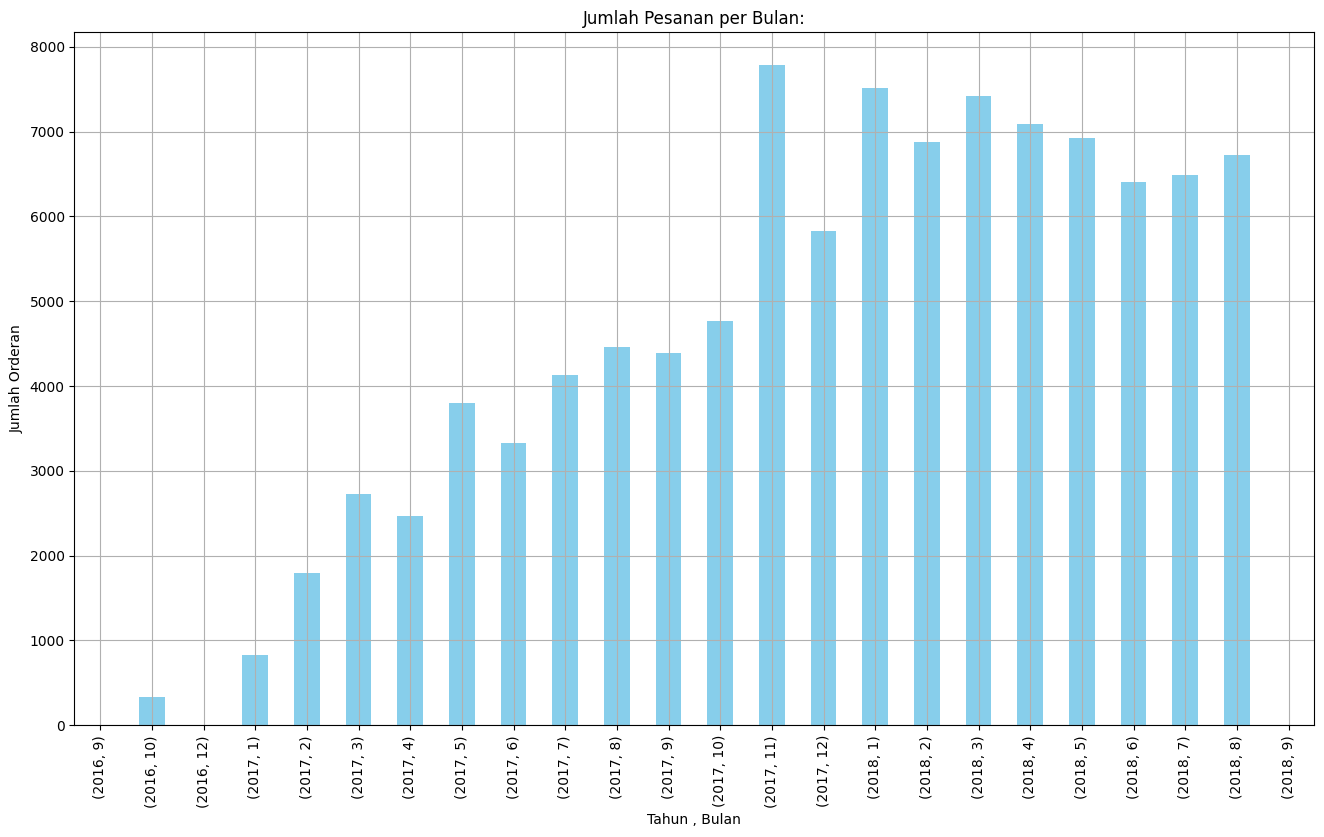

In [157]:
plt.figure(figsize = (16,9))
monthly_orders.plot(kind='bar', color='skyblue')
plt.title("Jumlah Pesanan per Bulan:")
plt.xlabel("Tahun , Bulan")
plt.ylabel("Jumlah Orderan")
plt.grid()

### Relasi menggabungkan dengan Products

**Gabungkan orders_df dengan items_df berdasarkan order_id.**

In [158]:
orders_items_products_df = pd.merge(orders_items_df, products_df, on='product_id', how='inner')
orders_items_products_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,order_purchase_year,order_purchase_month,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-05 16:24:09.321779509,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,2017,10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-28 02:09:13.321779509,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,2018,7,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-11 14:06:25.321779509,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,2018,8,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 00:55:42.321779509,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,2017,11,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-17 02:46:15.321779509,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,2018,2,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


**Menganalisis Kategori Produk yang Sering Terjual**

In [159]:
category_count = orders_items_products_df['product_category_name'].value_counts()
print("Kategori Produk yang Sering Terjual:")
category_count.head(10)

Kategori Produk yang Sering Terjual:


product_category_name
cama_mesa_banho           10151
beleza_saude               9021
esporte_lazer              7858
informatica_acessorios     6887
moveis_decoracao           6699
utilidades_domesticas      6019
relogios_presentes         5597
telefonia                  4287
automotivo                 3990
brinquedos                 3979
Name: count, dtype: int64

### Relasi Menggabungkan dengan Reviews

**Gabungkan orders_items_products_df dengan reviews_df berdasarkan order_id.**

In [160]:
orders_items_products_reviews_df = pd.merge(orders_items_products_df, reviews_df, on='order_id', how='inner')
orders_items_products_reviews_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-05 16:24:09.321779509,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-28 02:09:13.321779509,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,178.0,1.0,400.0,19.0,13.0,19.0,8d5266042046a06655c8db133d120ba5,4,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-11 14:06:25.321779509,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,232.0,1.0,420.0,24.0,19.0,21.0,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 00:55:42.321779509,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,468.0,3.0,450.0,30.0,10.0,20.0,359d03e676b3c069f62cadba8dd3f6e8,5,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-17 02:46:15.321779509,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,316.0,4.0,250.0,51.0,15.0,15.0,e50934924e227544ba8246aeb3770dd4,5,2018-02-17,2018-02-18 13:02:51


**Menghitung rata-rata Skor Ulasan**

In [161]:
average_review_score = orders_items_products_reviews_df['review_score'].mean()
print(f"Rata-rata Skor Ulasan: {average_review_score}")

Rata-rata Skor Ulasan: 4.077849796389777


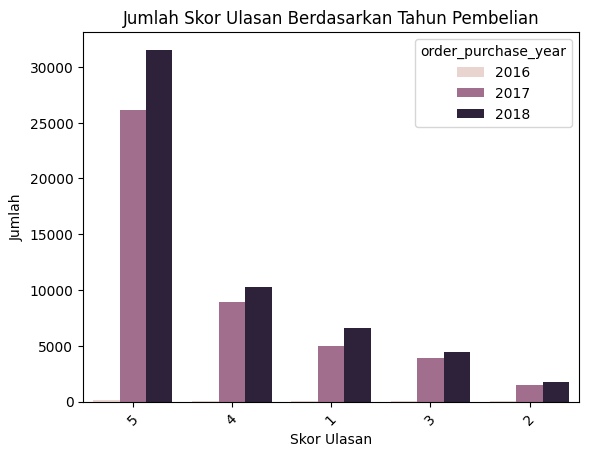

In [162]:
sns.countplot(data=orders_items_products_reviews_df, x='review_score', hue='order_purchase_year', order=orders_items_products_reviews_df['review_score'].value_counts().index[:10])
plt.title('Jumlah Skor Ulasan Berdasarkan Tahun Pembelian')
plt.xlabel('Skor Ulasan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

**Menganalisis Produk dengan Skor Ulasan Tertinggi**

In [163]:
top_rated_products = orders_items_products_reviews_df.groupby('product_id')['review_score'].mean().sort_values(ascending=False).head(10)
print("Produk dengan Skor Ulasan Tertinggi:")
top_rated_products.head(10)

Produk dengan Skor Ulasan Tertinggi:


product_id
00066f42aeeb9f3007548bb9d3f33c38    5.0
6029bc50edfd5d03b89293c6316b570c    5.0
c6eea384e62b799e78267eaeea987eaa    5.0
6004f0ea115c80b51e2f0e434233c0ca    5.0
60061c870d0d52a2c5bc678d56538fdd    5.0
c6e5e65a8d521761e0d1a4f6812fc2ea    5.0
600add16084eeeead5c56279ccef0d7e    5.0
600dd8d6e08f57945bf0798abe1b1b5b    5.0
6016ec35b91d455a84929e2066601c01    5.0
c6e474e4e7e08a02bd7153cfe6d68dfc    5.0
Name: review_score, dtype: float64

### Relasi menggabungkan dengan Sellers:

**Gabungkan orders_items_products_reviews_df dengan sellers_df berdasarkan seller_id.**

In [164]:
orders_items_products_reviews_sellers_df = pd.merge(orders_items_products_reviews_df, sellers_df, on='seller_id', how='inner')
orders_items_products_reviews_sellers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-28 02:09:13.321779509,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,19.0,13.0,19.0,8d5266042046a06655c8db133d120ba5,4,2018-08-08,2018-08-08 18:37:50,31570,belo horizonte,SP
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-11 14:06:25.321779509,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,24.0,19.0,21.0,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-18,2018-08-22 19:07:58,14840,guariba,SP
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 00:55:42.321779509,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,30.0,10.0,20.0,359d03e676b3c069f62cadba8dd3f6e8,5,2017-12-03,2017-12-05 19:21:58,31842,belo horizonte,MG
3,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-19 18:38:06.321779509,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,1,4520766ec412348b8d4caa5e8a18c464,...,16.0,16.0,17.0,07d67dd06ed5f88bef11ef6b464e79ae,5,2017-05-27,2017-05-28 02:59:57,12940,atibaia,SP
4,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-26 23:56:45.321779509,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00,1,ac1789e492dcd698c5c10b97a671243a,...,35.0,35.0,15.0,fc4af8aea8ec3f1a3cd181d3d0cadbd5,1,2017-02-03,2017-02-05 01:58:35,13720,sao jose do rio pardo,SP


**Menganalisis Penjual Berdasarkan Kota**

In [165]:
seller_city_count = orders_items_products_reviews_sellers_df['seller_city'].value_counts()
print("Jumlah Penjual Berdasarkan Kota:")
seller_city_count.head(10)

Jumlah Penjual Berdasarkan Kota:


seller_city
ibitinga                 7142
curitiba                 2760
belo horizonte           2364
rio de janeiro           2149
sao jose do rio preto    2004
maringa                  1938
ribeirao preto           1885
piracicaba               1757
campinas                 1309
praia grande             1251
Name: count, dtype: int64

### Relasi menggabungkan dengan Payments

**Gabungkan orders_items_products_reviews_sellers_df dengan payments_df berdasarkan order_id.**

In [166]:
orders_items_products_reviews_sellers_payments_df = pd.merge(
    orders_items_products_reviews_sellers_df, payments_df, on='order_id', how='inner'
)
orders_items_products_reviews_sellers_payments_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-28 02:09:13.321779509,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,4,2018-08-08,2018-08-08 18:37:50,31570,belo horizonte,SP,1,boleto,1,141.46
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-11 14:06:25.321779509,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,5,2018-08-18,2018-08-22 19:07:58,14840,guariba,SP,1,credit_card,3,179.12
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 00:55:42.321779509,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,5,2017-12-03,2017-12-05 19:21:58,31842,belo horizonte,MG,1,credit_card,1,72.20
3,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-19 18:38:06.321779509,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,1,4520766ec412348b8d4caa5e8a18c464,...,5,2017-05-27,2017-05-28 02:59:57,12940,atibaia,SP,1,credit_card,3,75.16
4,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-26 23:56:45.321779509,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00,1,ac1789e492dcd698c5c10b97a671243a,...,1,2017-02-03,2017-02-05 01:58:35,13720,sao jose do rio pardo,SP,1,boleto,1,35.95


**Menganalisis jenis Pembayaran yang Paling Sering Digunakan**

In [167]:
payment_type_count = orders_items_products_reviews_sellers_payments_df['payment_type'].value_counts()
print("Jenis Pembayaran yang Paling Sering Digunakan:")
payment_type_count

Jenis Pembayaran yang Paling Sering Digunakan:


payment_type
credit_card    45441
boleto         11678
voucher          862
debit_card       855
Name: count, dtype: int64

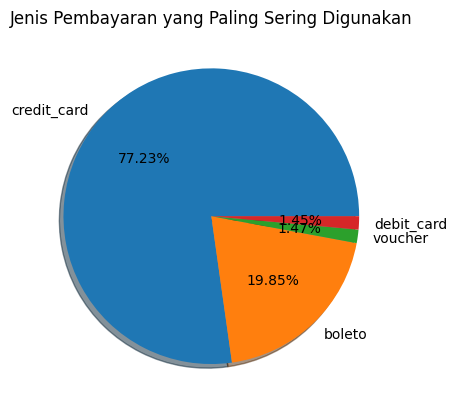

In [168]:
plt.pie(orders_items_products_reviews_sellers_payments_df['payment_type'].value_counts() , labels = orders_items_products_reviews_sellers_payments_df['payment_type'].value_counts().index,
       autopct = '%.2f%%', startangle = 0, shadow = True);
plt.title('Jenis Pembayaran yang Paling Sering Digunakan');

### Relasi menggabungkan dengan Translated Product Category Name

**Gabungkan orders_items_products_reviews_sellers_payments_df dengan translations_df berdasarkan product_category_name.**

In [169]:
final_dataset = pd.merge(
    orders_items_products_reviews_sellers_payments_df,
    translations_df, on='product_category_name', how='left'
)
final_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,product_category_name_english
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-28 02:09:13.321779509,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,2018-08-08,2018-08-08 18:37:50,31570,belo horizonte,SP,1,boleto,1,141.46,perfumery
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-11 14:06:25.321779509,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,2018-08-18,2018-08-22 19:07:58,14840,guariba,SP,1,credit_card,3,179.12,auto
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 00:55:42.321779509,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,2017-12-03,2017-12-05 19:21:58,31842,belo horizonte,MG,1,credit_card,1,72.20,pet_shop
3,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-19 18:38:06.321779509,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,1,4520766ec412348b8d4caa5e8a18c464,...,2017-05-27,2017-05-28 02:59:57,12940,atibaia,SP,1,credit_card,3,75.16,auto
4,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-26 23:56:45.321779509,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00,1,ac1789e492dcd698c5c10b97a671243a,...,2017-02-03,2017-02-05 01:58:35,13720,sao jose do rio pardo,SP,1,boleto,1,35.95,furniture_decor


**Menganalisis Kategori Produk yang Tidak Memiliki Terjemahan**

In [170]:
missing_translation = final_dataset[final_dataset['product_category_name_english'].isna()]['product_category_name'].unique()
print("Kategori Produk yang Tidak Memiliki Terjemahan:")
print(missing_translation)

Kategori Produk yang Tidak Memiliki Terjemahan:
[]


# Combine Data

**Menyimpan dataset akhir dalam file CSV** (penggabungan tujuh dataset tersebut dalam satu file akhirt)

In [171]:
final_dataset.to_csv('final_dataset.csv', index=False)